# Mini Project 2 - Fairness in ML 

This mini project is an extension of the in class practicum on fairness. Recall that in class, we examined two machine learning algorithms: a support vector machine and linear regression. We found evidence that these algorithms are racially discriminatory on a recidivism data set. In this mini project, you will work with a subset of the same data set and design algorithms to address these issues.

**DUE:** Oct. 7, noon (12pm)

**WHAT TO SUBMIT:** You should turn in your solution file (miniproject1_YOURUSERNAME.ipynb). Please complete all tasks, paying attention to the TODO's.  

**HOW TO SUBMIT:** Submit the file using LEARN (in upcoming events)(https://learn.uwaterloo.ca/d2l/home/492027)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

DTrain = np.load('train.npy')
DTest = np.load('test.npy')

### Data

DTrain and DTest are matrices (represented as 2-d numpy arrays) where every row corresponds to an individual and columns correspond to attributes or features. We will work with a simple data set. The columns correspond to:

0. Column 0 has the recidivism label. 1 means the individual recidivates within 2 years; 0 otherwise.
1. Column 1 has the racial group label. 0 means the individual is in the protected group, 1 otherwise.
2. Column 2 has the prior arrests count. It is a numeric value.

## Part 1 - Removing Disparate Impact

In this part of the assignment, you will develop an algorithm to prevent disparate impact. 

### TODO 1 - Write Disparate Impact and Accuracy Functions

First, write a function to calculate the uniform accuracy (that is, the fraction of correctly classified data). It will need to take two vectors: one giving the prediction labels of 0 or 1, and another giving the true labels of 0 or 1.

Second, write a function to calculate the disparate impact. It will need to take two vectors: one giving the race values 0 or 1, and another giving the prediction lables of 0 or 1. Recall that unlike in the Feldman et. al paper from class, a prediction value of 1 is now negative, so the disparate impact on racial group 0 will be a number greater than 1 indicating how much more likely a member of racial group 0 is to be predicted as recidivating than a member of racial group 1. Calling your function using the two_year_recid labels from DTrain should yield an answer of roughly 1.255.

In [2]:
def Accuracy(label, true):
    accuracy=0.0
    #TODO - Fill in a function to calculate uniform accuracy
    return(accuracy)

def DisparateImpact(race, label):
    di = 0.0
    # TODO - Fill in function to calculate disparate impact
    return(di)

print("Disparate Impact on the training data set: ", DisparateImpact(DTrain[:,1], DTrain[:,0]))

Disparate Impact on the training data set:  0.0


### Baselines 

Now we compute our baselines. In particular, we will use a linear SVM to perform prediction without any modifications to the data, and we will compute the uniform accuracy and disparate impact of our results on the test data set. Note that we are only using column 2, the prior arrests information, to learn a classifier from prior arrests to recidivism prediction. Finally, we plot the normalized histograms of the prior arrests information for each racial group. You do not need to modify the following code. 

Accuracy of standard linear SVM at test time:  0.0
Disparate Impact of standard linear SVM at test time:  0.0


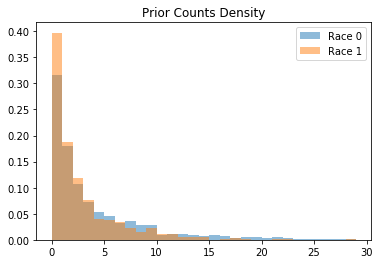

In [9]:
clf = svm.SVC(kernel="linear") # Initializing a stock SVM using a linear kernel
clf.fit(DTrain[:,2].reshape(-1,1), DTrain[:,0]) # Training a stock SVM
recidSVM = clf.predict(DTest[:,2].reshape(-1,1)) # 0/1 prediction values for the SVM

print("Accuracy of standard linear SVM at test time: ", Accuracy(recidSVM, DTest[:,0]))
print("Disparate Impact of standard linear SVM at test time: ", DisparateImpact(DTest[:,1], recidSVM))

plt.hist((DTest[DTest[:,1]==0])[:,2], bins=range(30), label='Race 0', density=True, alpha=0.5)
plt.hist((DTest[DTest[:,1]==1])[:,2], bins=range(30), label='Race 1', density=True, alpha=0.5)
plt.legend(loc='upper right')
plt.title("Prior Counts Density")
plt.show()

### TODO 2 - Repair The Data to Remove Disparate Impact

Now you will implement a function to repair the test data set so that when we run our classifier, we no longer observe disparate impact. Your function should take as input a data matrix as specified above, and return a repaired version. Note that you only need to modify the prior arrests values in order to repair the dataset. Also, note that there are twice as many protected as unprotected individuals in the data set.

In [4]:
def Repair(D):
    DRep = np.copy(D)
    #TODO - Fill in this function to repair D
    return(DRep)

### TODO 3 - Prove Correctness

Prove that any classifier from the repaired prior arrests data to {0,1} will have disparate impact 1.

**Proof:** (TODO: ADD YOUR PROOF HERE)

### Measuring Accuracy and Disparate Impact

Now, we want to check and make sure that our algorithm worked, and compare it's accuracy to that of the SVM on the original data set. We also print the repaired histogram of prior arrest counts. You do not need to modify the following code.

Accuracy of repaired standard linear SVM at test time:  0.0
Disparate Impact of standard linear SVM at test time:  0.0


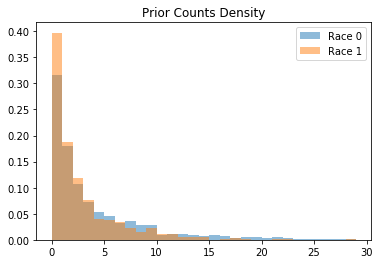

In [5]:
DRep = Repair(DTest)
repRecidSVM = clf.predict(DRep[:,2].reshape(-1,1)) # 0/1 prediction values for the SVM

print("Accuracy of repaired standard linear SVM at test time: ", Accuracy(repRecidSVM, DRep[:,0]))
print("Disparate Impact of standard linear SVM at test time: ", DisparateImpact(DRep[:,1], repRecidSVM))

plt.hist((DRep[DRep[:,1]==0])[:,2], bins=range(30), label='Race 0', density=True, alpha=0.5)
plt.hist((DRep[DRep[:,1]==1])[:,2], bins=range(30), label='Race 1', density=True, alpha=0.5)
plt.legend(loc='upper right')
plt.title("Prior Counts Density")
plt.show()

## Part 2 - Equalized Odds

In this part of the assignment, we will develop an algorithm to equalize odds: the false positive rates and true positive rates.

### TODO 4 - Write Function to Calculate False Positive Rate and True Positive Rate

Recall the confusion matrix. Let 'true' be an individuals true label (i.e., the value of two_year_recid in the original data), and let 'label' be our prediction for that individual. We say that a prediction is a:

- true positive if true = label = 1
- true negative if true = label = 0
- false positive if true = 0 but label = 1
- false negative if true = 1 but label = 0

The false positive rate is the number of false positives divided by the total number of individuals whose true label is 0 (i.e., the sum of false positives and true negatives). 

The true positive rate is the number of true positives divided by the total number of individuals whose true label is 1 (i.e., the sum of false negatives and true positives). 

Write two functions: one to calculate the false positive rate, and another to calculate the true positive rate. It will need to take two vectors: one giving the prediction labels of 0 or 1, and another giving the true labels of 0 or 1.

In [6]:
def FalsePositiveRate(label, true):
    fpr = 0.0
    #TODO - Fill in function to calculate false positive rate
    return(fpr)

def TruePositiveRate(label, true):
    tpr = 0.0
    #TODO - Fill in function to calculate true positive rate
    return(tpr)

### Baseline 

We will use logistic regression to perform prediction without any modifications to the data, and we will compute the false positive rate for both the protected and unprotected group to compare. Again, we are only using column 2, the prior arrests information, to learn a classifier from prior arrests to recidivism prediction. You do not need to modify the following code. You should get false positive rates of around 0.152 for group 0 and 0.116 for group 1; and true positive rates of around 0.397 for group 0 and 0.284 for group 1.

In [7]:
from sklearn import linear_model as lm
mod = lm.LogisticRegression(penalty="l2", tol=0.01, fit_intercept=True, intercept_scaling=1, solver="liblinear")                            
mod.fit(DTrain[:,2].reshape(-1,1), DTrain[:,0]) # Fitting to the data
recidLR = mod.predict(DTest[:,2].reshape(-1,1)) # 0/1 prediction values for logistic regression

print("False positive rate for protected group: ", FalsePositiveRate(recidLR[DTest[:,1]==0], DTest[DTest[:,1]==0][:,0]))
print("False positive rate for unprotected group: ", FalsePositiveRate(recidLR[DTest[:,1]==1], DTest[DTest[:,1]==1][:,0]))

print("True positive rate for protected group: ", TruePositiveRate(recidLR[DTest[:,1]==0], DTest[DTest[:,1]==0][:,0]))
print("True positive rate for unprotected group: ", TruePositiveRate(recidLR[DTest[:,1]==1], DTest[DTest[:,1]==1][:,0]))

False positive rate for protected group:  0.0
False positive rate for unprotected group:  0.0
True positive rate for protected group:  0.0
True positive rate for unprotected group:  0.0


### Model The Problem

We want to derive a new classification (call it y) from recidLR and racial group in order to make the false positive rates and true positive rates equal in expectation. To do this, we introduce four variables:

1. x[0] = Pr(y=1 | recidLR=0, race=0)
2. x[1] = Pr(y=1 | recidLR=1, race=0)
3. x[2] = Pr(y=1 | recidLR=0, race=1)
4. x[3] = Pr(y=1 | recidLR=1, race=1)

### Derive New Classifier

We will need to figure out the values of these variables, but once we have solved for them, we derive our new classification by the following: for every data point, set y to 1 with the probability corresponding to that data point's recidLR and race information, else set it to 0. A function to perform this derivation is given for you.

**Note** If you want to define variables differently and write your own derive function, that is fine, just ensure that you are only deriving your new classifier using recidLR and race.

In [8]:
def Derive(race, label, x):
    rand = np.random.random(len(race))
    newLabel = np.zeros(len(race))
    for i in range(len(race)):
        if((label[i]==0) and (race[i]==0)):
            p=x[0]
        if((label[i]==1) and (race[i]==0)):
            p=x[1]
        if((label[i]==0) and (race[i]==1)):
            p=x[2]
        if((label[i]==1) and (race[i]==1)):
            p=x[3]
            
        if(rand[i] < p):
            newLabel[i]=1
        else:
            newLabel[i]=0
    return(newLabel)

### Compute The Probabilities x[0], ..., x[3]

You will write a function that takes in race, label, and true, and computes probabilities x[0], ..., x[3] so that the expected predictions after running Derive satisfy equalized odds: that is, equal false positive rates and true positive rates in expectation. Of course, one could always set all of the variables to 0 to trivially satisfy equalized odds, so subject to these constraints, define some objective for your derived classifier, and try to derive a classifier that performs well on your objective. The [Hardt et al](https://arxiv.org/pdf/1610.02413.pdf) paper gives one possible solution.

First, define your objective, write out your algorithm/transformation mathematically, and prove that it satisfies equalized odds. Second, write the function that implements your algorithm/transformation.

(hint: While you may accomplish this task however you wish, one very general purpose technique is optimization via linear programming. You can solve linear programs using scipy in python (scipy comes with anaconda, so you shouldn't need to install anything). See [scipy documentation](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.linprog.html), for documentation and an example.) 

### TODO 5 - Define Your Objective

(TODO: WRITE YOUR OPTIMIZATION OBJECTIVE HERE)

### TODO 6 - Write Your Algorithm/Transformation and Prove it Satisfies Equalized Odds

First, write your algorithm for computing the probabilities x[0], ..., x[3] in English/pseudocode/math, and argue that the classifier derived from these will satisfy equalized odds in expectation.

**Algorithm** (TODO: ADD YOUR ALGORITHM HERE)

**Proof:** (TODO: ADD YOUR PROOF HERE)

### TODO 7 - Write a Function That Implements Your Algorithm

Your function should try to do well on your objective while satisfying equalized odds.

In [ ]:
def ComputeProbabilities(race, label, true):
    x = np.zeros(4)
    #TODO - Fill in the following function to compute the probabilities necessary 
    # to derive an equalized odds classifier that does well on your objective
    return(x)

### TODO 8 - Measurements and Discussion

Here, we compute the probabilities x[0], ..., x[3] once, then run Derive 500 times and take the averages (since our guarantees are in expectation). Both groups should have nearly equal false positive rates, and both groups should have nearly equal true positive rates on average. 

Add code to measure your objective, and measure your objective on the original classifier (recidLR), as well as the average objective accross the 500 runs of derive. Briefly discuss your results. Does your objective seem to be opposed to equalized odds? If so, why? 

In [ ]:
#TODO - Add code to measure your objective on recidLR and in average on your derived classifier

x = ComputeProbabilities(DTest[:,1], recidLR, DTest[:,0])
print("The results of the linear program: ", x)
T = 500
fprSum = np.zeros(2)
tprSum = np.zeros(2)
for t in range(T):
    newRecidLR = Derive(DTest[:,1], recidLR, x)
    for i in range(2):
        fprSum[i] = fprSum[i] + FalsePositiveRate(newRecidLR[DTest[:,1]==i], DTest[DTest[:,1]==i][:,0])
        tprSum[i] = tprSum[i] + TruePositiveRate(newRecidLR[DTest[:,1]==i], DTest[DTest[:,1]==i][:,0])

#TODO - Print the value of your objective on recidLR and in average on your derived classifier        
print("Average false positive rates of new classifier: ", fprSum/T)
print("Average true positive rates of new classifier: ", tprSum/T)

**Discuss** - (TODO - BRIEFLY DISCUSS YOUR RESULTS HERE)

## Part 3 (Bonus) - Get Creative

In this (optional) part of the assignment, you should get creative by defining your own notions of utility (for example, uniform accuracy, or perhaps l2 error) and fairness (for example, we have already considered disparate impact and equalized odds). 

Work with the same datasets as before (DTrain and DTest). Measure a baseline machine learning method (like the linear SVM, or logistic regression) with respect to your notion of utility and fairness. Give an algorithm for addressing your notion of fairness (this could be a data preprocessing step as above, a postprocessing step, or any other kind of algorithmic change). Finally, demonstrate that your algorithm is effective, and measure the loss in utility.  

You are allowed to use other fairness notions and or implement algorithms discussed in class or in papers, but are not required to. If you do, please cite where the notions and or algorithms come from.

### Bonus TODO 1 - Define Your Utility and Fairness Notion

Write text defining your utility and fairness notion, as well as code to measure it. Argue why it is a reasonable notion.



**Definitions** (TODO - ADD DEFINITIONS AND DISCUSSION HERE)

In [ ]:
# TODO - Write code to measure your notions here

### Bonus TODO 2 - Give an Algorithm to Address Your Notion of Fairness

Write text describing your approach, as well as code to implement it.

**Algorithm** (TODO - DESCRIBE YOUR ALGORITHM HERE)

In [ ]:
# TODO - Write code to implement your algorithm here

### Bonus TODO 3 - Measure Your Results

Write code to measure your results, and describe the results in English.

In [ ]:
# TODO - Write code to measure your results

**Discussion** (DESCRIBE YOUR RESULTS HERE)